In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#loading the file as per instructions
df = pd.read_csv('train.csv')

In [3]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


## Feature Engineering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [5]:
#Let's check the null value in terms of percentage
df.isna().sum()/len(df)

customer_id                     0.000000
Name                            0.000000
age                             0.000000
gender                          0.000000
security_no                     0.000000
region_category                 0.146734
membership_category             0.000000
joining_date                    0.000000
joined_through_referral         0.000000
referral_id                     0.000000
preferred_offer_types           0.007785
medium_of_operation             0.000000
internet_option                 0.000000
last_visit_time                 0.000000
days_since_last_login           0.000000
avg_time_spent                  0.000000
avg_transaction_value           0.000000
avg_frequency_login_days        0.000000
points_in_wallet                0.093074
used_special_discount           0.000000
offer_application_preference    0.000000
past_complaint                  0.000000
complaint_status                0.000000
feedback                        0.000000
churn_risk_score

In [6]:
# fill all the Nan value with mean wherever wee can
df = df.fillna(df.mean())

In [7]:
df.isna().sum()/len(df)

customer_id                     0.000000
Name                            0.000000
age                             0.000000
gender                          0.000000
security_no                     0.000000
region_category                 0.146734
membership_category             0.000000
joining_date                    0.000000
joined_through_referral         0.000000
referral_id                     0.000000
preferred_offer_types           0.007785
medium_of_operation             0.000000
internet_option                 0.000000
last_visit_time                 0.000000
days_since_last_login           0.000000
avg_time_spent                  0.000000
avg_transaction_value           0.000000
avg_frequency_login_days        0.000000
points_in_wallet                0.000000
used_special_discount           0.000000
offer_application_preference    0.000000
past_complaint                  0.000000
complaint_status                0.000000
feedback                        0.000000
churn_risk_score

In [8]:
#for categorical features use mode
df['region_category'].fillna(df['region_category'].mode()[0], inplace=True)
df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0], inplace=True)

In [9]:
df.isna().sum()/len(df)

customer_id                     0.0
Name                            0.0
age                             0.0
gender                          0.0
security_no                     0.0
region_category                 0.0
membership_category             0.0
joining_date                    0.0
joined_through_referral         0.0
referral_id                     0.0
preferred_offer_types           0.0
medium_of_operation             0.0
internet_option                 0.0
last_visit_time                 0.0
days_since_last_login           0.0
avg_time_spent                  0.0
avg_transaction_value           0.0
avg_frequency_login_days        0.0
points_in_wallet                0.0
used_special_discount           0.0
offer_application_preference    0.0
past_complaint                  0.0
complaint_status                0.0
feedback                        0.0
churn_risk_score                0.0
dtype: float64

In [10]:
# replacing the '?' with most frequent value in particular feature column
df['joined_through_referral'] = df['joined_through_referral'].apply(lambda x:'No' if x == '?' else x)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medium_of_operation', ylabel='count'>

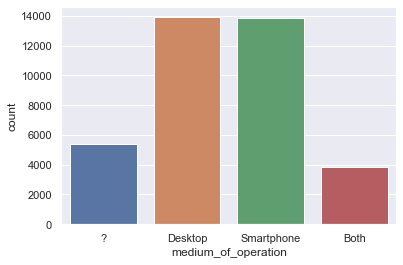

In [11]:
sns.countplot(df['medium_of_operation'])

In [12]:
df['medium_of_operation'] = df['medium_of_operation'].apply(lambda x:'Desktop' if x == '?' else x)

In [13]:
df['medium_of_operation'].unique()

array(['Desktop', 'Smartphone', 'Both'], dtype=object)

In [14]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,184.811682,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,624.350000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,686.882199,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,757.002500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [15]:
# because of -1, we are using absolute for churn_risk_score column
df['churn_risk_score'] = abs(df['churn_risk_score'])

Solving the issue of negative value by approaching with '0'.

In [16]:
df['points_in_wallet'] = df['points_in_wallet'].apply(lambda x:0 if x <=0 else x)

In [17]:
df['days_since_last_login'] = df['days_since_last_login'].apply(lambda x:0 if x <=0 else x)

In [18]:
df['avg_time_spent'] = df['avg_time_spent'].apply(lambda x:0 if x <=0 else x)

<AxesSubplot:>

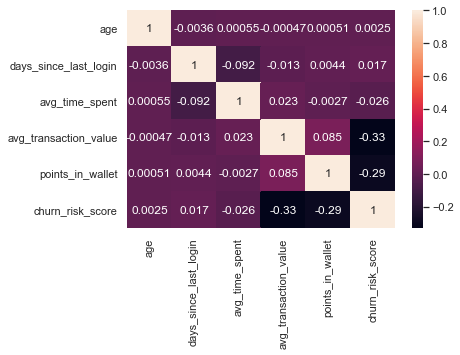

In [19]:
sns.heatmap(df.corr(), annot=True)

In [20]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,12.069096,279.147450,29271.194003,687.493417,3.526276
std,15.867412,6.139792,329.947709,19444.806226,182.037098,1.244039
min,10.000000,0.000000,0.000000,800.460000,0.000000,1.000000
25%,23.000000,8.000000,60.102500,14177.540000,624.350000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,686.882199,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,757.002500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


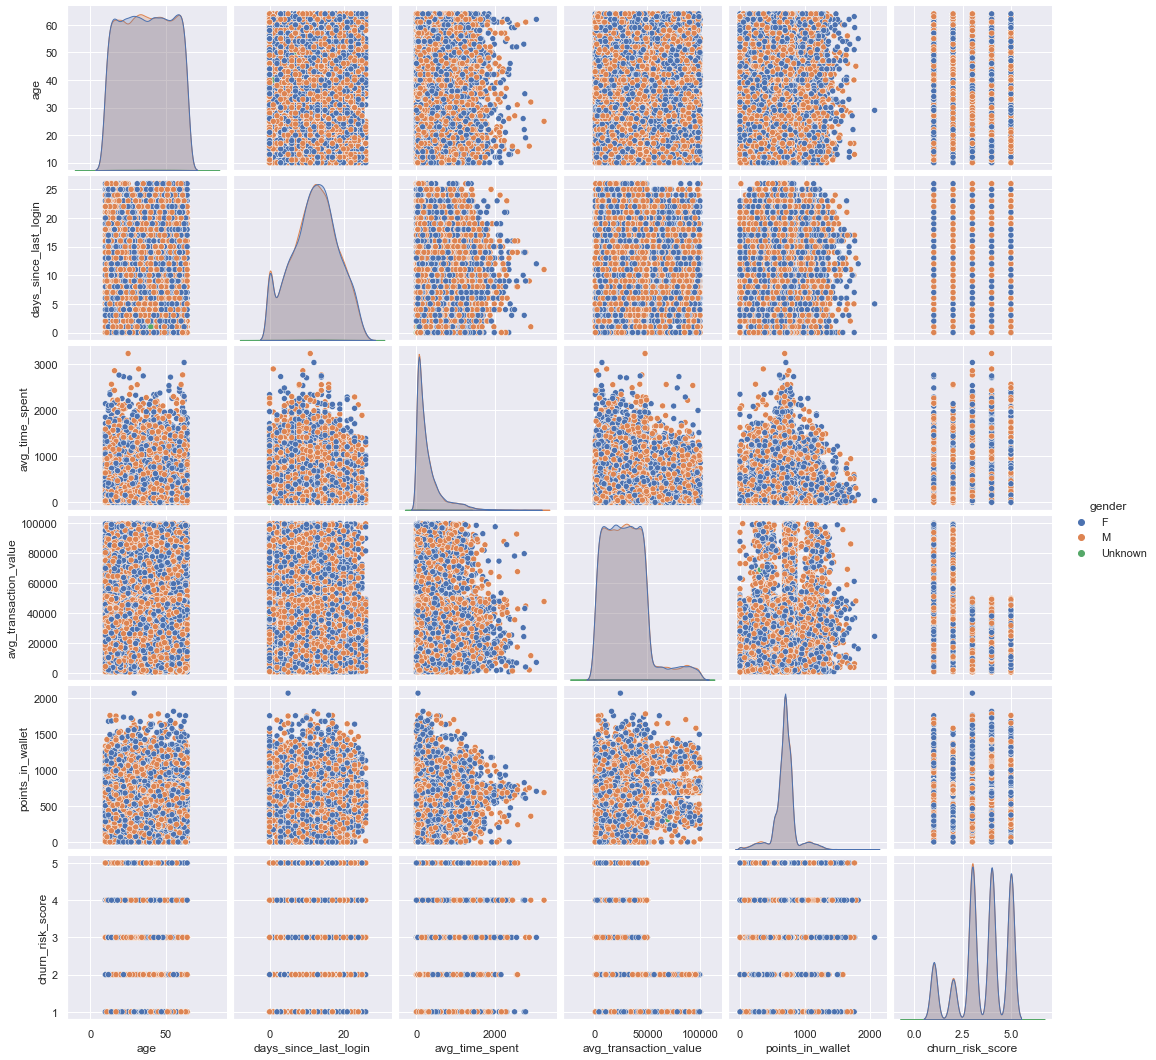

In [21]:
sns.pairplot(df, hue='gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

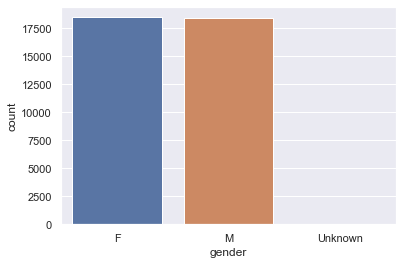

In [22]:
sns.countplot(x='gender', data=df)

Now create dummies for catgorical features.

In [23]:
dummy1 = pd.get_dummies(df['gender'], drop_first=True)

In [24]:
dummy2 = pd.get_dummies(df['region_category'], drop_first=True)
dummy3 = pd.get_dummies(df['membership_category'], drop_first=True)
dummy4 = pd.get_dummies(df['joined_through_referral'], drop_first=True)
dummy5 = pd.get_dummies(df['preferred_offer_types'], drop_first=True)
dummy6 = pd.get_dummies(df['used_special_discount'], drop_first=True)
dummy7 = pd.get_dummies(df['offer_application_preference'], drop_first=True)
dummy8 = pd.get_dummies(df['past_complaint'], drop_first=True)
dummy9 = pd.get_dummies(df['complaint_status'], drop_first=True)
dummy10 = pd.get_dummies(df['feedback'], drop_first=True)

In [25]:
# dropping all the original categorical features
df = df.drop(['customer_id','gender','region_category','membership_category','joined_through_referral',
               'preferred_offer_types','used_special_discount','offer_application_preference',
              'past_complaint','complaint_status','feedback','avg_frequency_login_days',
              'last_visit_time','internet_option','medium_of_operation','referral_id',
              'security_no','Name'], axis=1)

In [26]:
#create a new dataframe using concatenate 
df_new = pd.concat([df,dummy1,dummy2,dummy3,dummy4,dummy5,dummy6,dummy7,dummy8,dummy9,dummy10],axis=1)

In [27]:
#using datetime to get date time feature
import datetime as dt
df_new['Date'] = pd.to_datetime(df_new['joining_date'])
df_new['Year'] = df_new['Date'].dt.year
df_new['Month'] = df_new['Date'].dt.month
df_new['Day'] = df_new['Date'].dt.day

In [28]:
df_new = df_new.drop(['joining_date', 'Date'], axis=1)

Set all the columns in order

In [29]:
df_new.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'churn_risk_score', 'M',
       'Unknown', 'Town', 'Village', 'Gold Membership', 'No Membership',
       'Platinum Membership', 'Premium Membership', 'Silver Membership', 'Yes',
       'Gift Vouchers/Coupons', 'Without Offers', 'Yes', 'Yes', 'Yes',
       'Not Applicable', 'Solved', 'Solved in Follow-up', 'Unsolved',
       'Poor Customer Service', 'Poor Product Quality', 'Poor Website',
       'Products always in Stock', 'Quality Customer Care', 'Reasonable Price',
       'Too many ads', 'User Friendly Website', 'Year', 'Month', 'Day'],
      dtype='object')

In [30]:
df_new = df_new[['age', 'Year', 'Month', 'Day', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet',
       'Year', 'Month', 'Day', 'M', 'Unknown', 'Town', 'Village',
       'Gold Membership', 'No Membership', 'Platinum Membership',
       'Premium Membership', 'Silver Membership', 'Yes',
       'Gift Vouchers/Coupons', 'Without Offers', 'Yes', 'Yes', 'Yes',
       'Not Applicable', 'Solved', 'Solved in Follow-up', 'Unsolved',
       'Poor Customer Service', 'Poor Product Quality', 'Poor Website',
       'Products always in Stock', 'Quality Customer Care', 'Reasonable Price',
       'Too many ads', 'User Friendly Website', 'churn_risk_score']]

In [31]:
df_new.head()

,age,Year,Month,Day,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,Year,Month,...,Unsolved,Poor Customer Service,Poor Product Quality,Poor Website,Products always in Stock,Quality Customer Care,Reasonable Price,Too many ads,User Friendly Website,churn_risk_score
0,18,2017,8,17,17,300.63,53005.25,781.750000,2017,8,...,0,0,0,0,1,0,0,0,0,2
1,32,2017,8,28,16,306.34,12838.38,686.882199,2017,8,...,0,0,0,0,0,1,0,0,0,1
2,44,2016,11,11,14,516.16,21027.00,500.690000,2016,11,...,0,0,0,1,0,0,0,0,0,5
3,37,2016,10,29,11,53.27,25239.56,567.660000,2016,10,...,1,0,0,1,0,0,0,0,0,5
4,31,2017,9,12,20,113.13,24483.66,663.060000,2017,9,...,0,0,0,1,0,0,0,0,0,5


## Stadardising and Train-Test split of data

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df_new.drop('churn_risk_score', axis=1)
y = df_new['churn_risk_score']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
norm = MinMaxScaler().fit(X_train)
X_trans = norm.transform(X_train)

X_test_trans = norm.transform(X_test)

## Model creation and prediction

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_model = LogisticRegression(solver='lbfgs')

In [39]:
log_model.fit(X_trans,y_train)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
prediction = log_model.predict(X_test_trans)

looking for accuracy and precision etc.

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
print(classification_report(y_test,prediction))
print('\n')
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           1       0.59      0.67      0.62       742
           2       0.81      0.37      0.51       548
           3       0.83      0.84      0.83      2087
           4       0.64      0.36      0.46      2020
           5       0.64      0.99      0.78      2002

    accuracy                           0.70      7399
   macro avg       0.70      0.64      0.64      7399
weighted avg       0.70      0.70      0.67      7399



[[ 494   47   70   42   89]
 [ 345  203    0    0    0]
 [   0    0 1748  339    0]
 [   0    0  284  726 1010]
 [   0    0    0   29 1973]]


Logistic Regression model's performance was good but let's try Random Forest 

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
cls = RandomForestClassifier(n_estimators=600, max_depth=25)

In [45]:
cls.fit(X_trans,y_train)

RandomForestClassifier(max_depth=25, n_estimators=600)

In [46]:
prediction2 = cls.predict(X_test_trans)

In [47]:
print(classification_report(y_test,prediction2))
print('\n')
print(confusion_matrix(y_test,prediction2))

              precision    recall  f1-score   support

           1       0.75      0.58      0.65       742
           2       0.78      0.74      0.76       548
           3       0.87      0.89      0.88      2087
           4       0.70      0.52      0.60      2020
           5       0.68      0.91      0.78      2002

    accuracy                           0.75      7399
   macro avg       0.76      0.73      0.73      7399
weighted avg       0.75      0.75      0.74      7399



[[ 428  113   74   53   74]
 [ 144  404    0    0    0]
 [   0    0 1859  228    0]
 [   0    0  190 1054  776]
 [   0    0    4  174 1824]]


We've got a good level of improvement. So, now we are going to deploy the model for further use by using pickel library.

#### Dump the model, so we can use it later for test data

In [48]:
import pickle

In [49]:
file_name = 'Churn_risk_rate.sav'
pickle.dump(cls, open(file_name, 'wb'))